# Ejemplos de Bisección e Iteración de Punto Fijo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Cálculo del error

\begin{equation}
    error = |x - r|
\end{equation}

In [2]:
error = lambda x, r: np.abs(x - r)

## Problema

Obtener $\sqrt{2}$

\begin{equation}
    \begin{split}
        x & = \sqrt{2} \quad /()^2\\
        x^2 & = 2
    \end{split}
\end{equation}

Si bien llegamos a una ecuación cuadrática la cual tiene dos soluciones, nos interesa el valor positivo por lo que tanto para la *bisección* como para la *IPF* debemos elegir convenientemente el intervalo y estimación inicial respectivamente. Para este problema debería tomarse en cuenta $x>0$.

## Resolución utilizando Bisección

Se define $f(x)$
\begin{equation}
    f(x)=x^2-2=0
\end{equation}

In [3]:
def bisect(f, a, b, tol=1e-8):
    fa = f(a)
    fb = f(b)
    i = 0
    x = []
    
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None

    while (b-a)/2 > tol:
        c = (a+b)/2.
        x.append(c)
        fc = f(c)
        # Did we find the root?
        if fc == 0:
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
        
    #xc = (a+b)/2.
    return np.array(x)#xc

In [4]:
f = lambda x: x ** 2 - 2

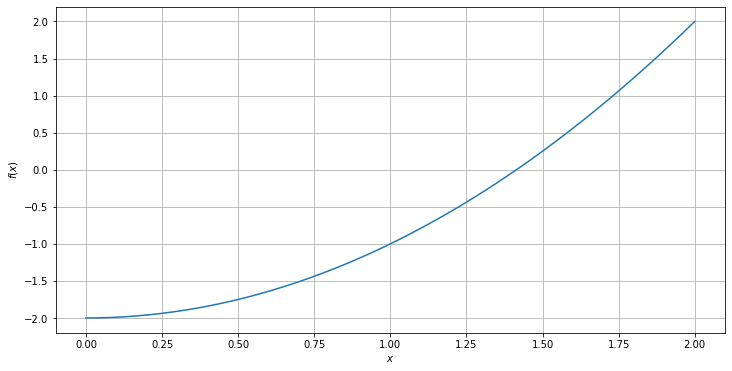

In [5]:
x = np.linspace(0, 2)
plt.figure(figsize=(12, 6))
plt.plot(x, f(x))
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

Buscamos el intervalo donde $f(a)\, f(b) < 0$. En este caso $[a, b]=[1,2]$ parece ser útil.

In [6]:
x_b = bisect(f, 1, 2)

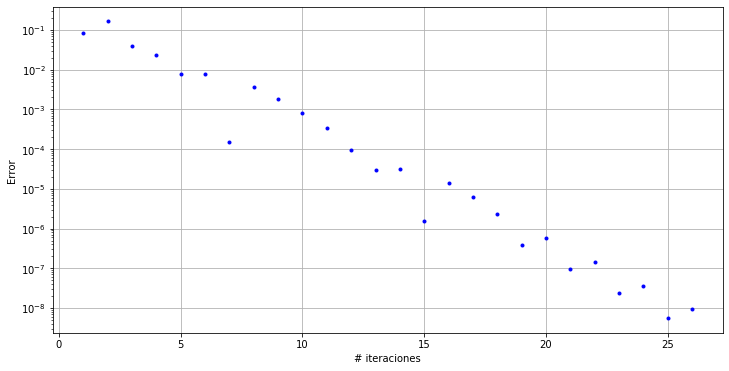

In [7]:
n_i = np.arange(1, len(x_b) + 1)
er = error(x_b, np.sqrt(2))
plt.figure(figsize=(12, 6))
plt.plot(n_i, er, 'b.')
plt.grid(True)
plt.xlabel("# iteraciones")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

El error decae linealmente a medida que se aumenta el número de iteraciones.

## Resolución utilizando punto Fijo

In [8]:
def cobweb(x, g=None):
    min_x = np.amin(x)
    max_x = np.amax(x)
    
    plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.plot(np.array([min_x,max_x]),np.array([min_x,max_x]),'b-')
    for i in np.arange(x.size-1):
        delta_x = x[i+1]-x[i]
        head_length =  np.abs(delta_x)*0.04
        arrow_length = delta_x-np.sign(delta_x)*head_length
        ax.arrow(x[i], x[i], 0, arrow_length, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
        ax.arrow(x[i], x[i+1], arrow_length, 0, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
    
    if g!=None:
        y = np.linspace(min_x,max_x,1000)
        plt.plot(y,g(y),'r')
    
    plt.title('Cobweb diagram')
    plt.grid(True)
    plt.show()

In [9]:
def fpi(g, x0, k, tol=1e-16, flag_cobweb=False):
    x = np.empty(k+1)
    x[0] = x0
    for i in range(k):
        if np.abs(x[i] - x[i-1]) <= tol:
            x = x[:i]
            break
        x[i+1] = g(x[i])
        
    if flag_cobweb:
        cobweb(x, g)
        
    return x[1:]

### Manejo algebraico:

Debemos construir $g(x)$ para utilizar el algoritmo.

\begin{equation}
    x=g(x)
\end{equation}

#### Version 1

\begin{equation}
    \begin{split}
        x^2 & = 2 \quad / \frac{1}{x}\\
        x & = \frac2x \\
        g_1(x) & = \frac2x
    \end{split}
\end{equation}


#### Version 2

\begin{equation}
    \begin{split}
        x^2 & = 2 \quad / +x\\
        x^2 + x & = 2+x \\
        x & = 2 + x - x^2 \\
        g_2(x) & = 2 + x - x^2
    \end{split}
\end{equation}

#### Version 3

\begin{equation}
    \begin{split}
        x^2 & = 2 \quad / +x^3\\
        x^3 + x^2 & = 2 + x^3 \\
        x(x^2 + x) & = 2 + x^3 \\
        x & = \frac{2+x^3}{x^2 + x} \\
        g_3(x) & = \frac{2+x^3}{x^2 + x}
    \end{split}
\end{equation}

#### Version 4

\begin{equation}
    \begin{split}
        x^2 & = 2 \quad / +x^2\\
        2x^2 & = 2+x^2 \quad  /\frac{1}{2x} \\
        x & = \frac{2 + x^2}{2x} \\
        x & = \frac1x + \frac{x}{2} \\
        g_4(x) & = \frac1x + \frac{x}{2}
    \end{split}
\end{equation}


Algunas funciones se pueden indeterminar para ciertos valores como en el caso de $g_3(x)$ y $g_4(x)$, por lo que hay que tener cuidado con la selección de $x_0$.

In [10]:
g1 = lambda x: 2 / x
g2 = lambda x: 2 + x - x ** 2
g3 = lambda x: (2 + x ** 3) / (x ** 2 + x)
g4 = lambda x: 1 / x + x / 2

### Visualización de las funciones $g(x)$

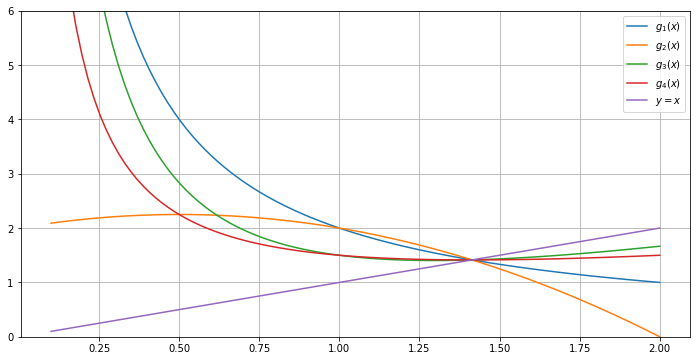

In [11]:
x2 = np.linspace(0.1, 2, 100)
plt.figure(figsize=(12, 6))
plt.plot(x2, g1(x2), label=r"$g_1(x)$")
plt.plot(x2, g2(x2), label=r"$g_2(x)$")
plt.plot(x2, g3(x2), label=r"$g_3(x)$")
plt.plot(x2, g4(x2), label=r"$g_4(x)$")
plt.plot(x2, x2, label=r"$y=x$")
plt.ylim([0, 6])
plt.grid(True)
plt.legend()
plt.show()

### Aplicación de IPF

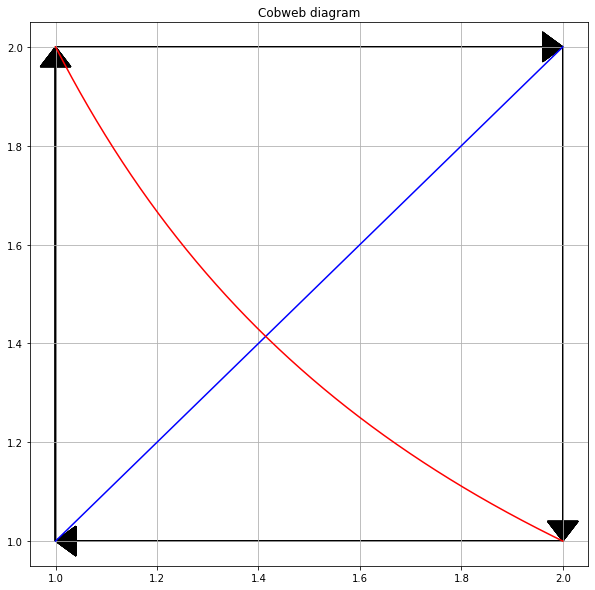

array([2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.,
       1., 2., 1.])

In [12]:
x_f_1 = fpi(g1, 1, 20, flag_cobweb=True)
x_f_1

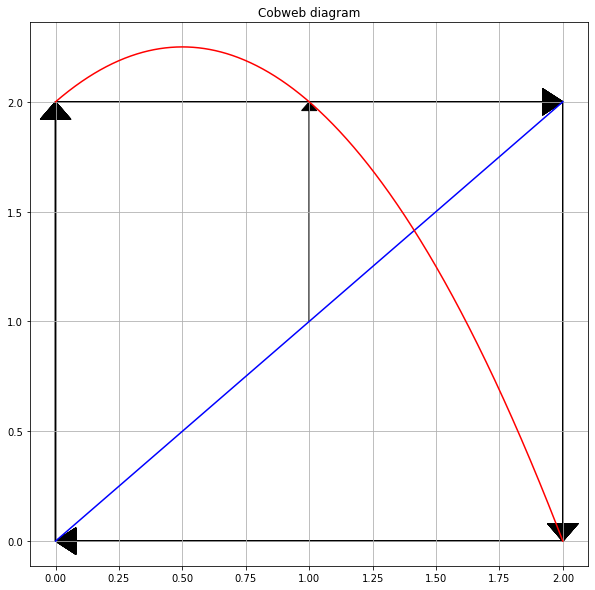

array([2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0.])

In [13]:
x_f_2 = fpi(g2, 1, 20, flag_cobweb=True)
x_f_2

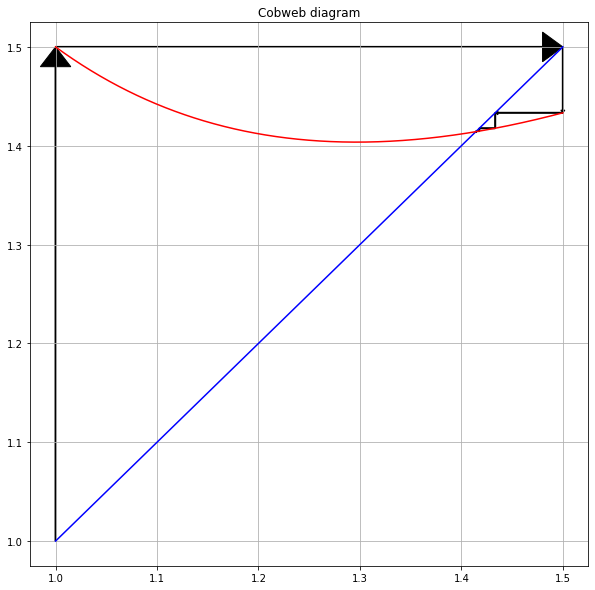

array([1.5       , 1.43333333, 1.41772327, 1.41482355, 1.41431846,
       1.41423157, 1.41421665, 1.41421409, 1.41421365, 1.41421358,
       1.41421357, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356])

In [14]:
x_f_3 = fpi(g3, 1, 20, flag_cobweb=True)
x_f_3

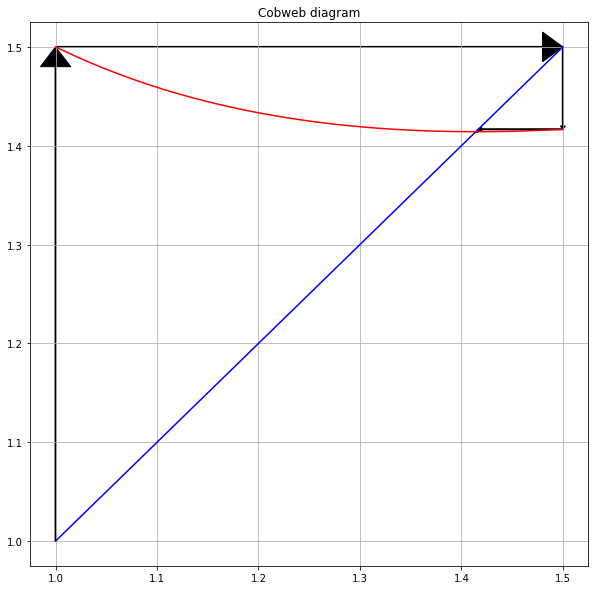

array([1.5       , 1.41666667, 1.41421569, 1.41421356, 1.41421356])

In [15]:
x_f_4 = fpi(g4, 1, 20, flag_cobweb=True)
x_f_4

Según la $g(x)$ y $x_0$ que se escoja, la *IPF* puede no converger o iterar alternando entre dos valores.

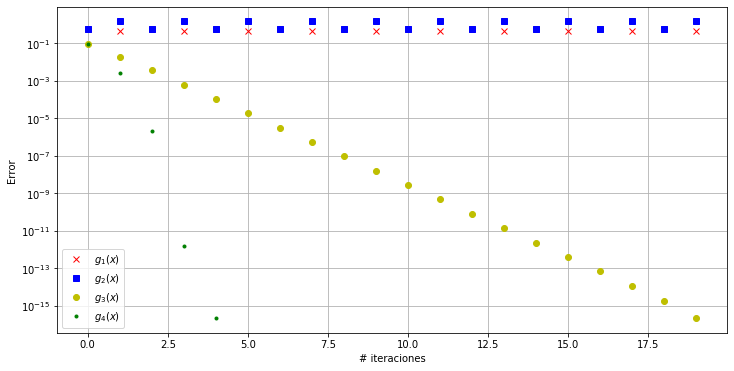

In [16]:
er_f_1 = error(x_f_1, np.sqrt(2))
er_f_2 = error(x_f_2, np.sqrt(2))
er_f_3 = error(x_f_3, np.sqrt(2))
er_f_4 = error(x_f_4, np.sqrt(2))
plt.figure(figsize=(12, 6))
plt.plot(er_f_1, 'rx', label=r'$g_1(x)$')
plt.plot(er_f_2, 'bs', label=r'$g_2(x)$')
plt.plot(er_f_3, 'yo', label=r'$g_3(x)$')
plt.plot(er_f_4, 'g.', label=r'$g_4(x)$')
plt.grid(True)
plt.xlabel("# iteraciones")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()
plt.show()

Notar del gráfico que según el $g(x)$ utilizado podemos obtener una solución mucho más rápido como en el caso de $g_4(x)$.

## Convergencia

### Cota teórica

\begin{equation}
    \frac{\epsilon_{i+1}}{\epsilon_i} = \frac{|x_{i+1}-r|}{|x_{i}-r|}
\end{equation}

Veamos la convergencia de los resultados obtenidos

In [17]:
conv_t = lambda x, r: error(x[1:], r) / error(x[:-1], r)

#### Para bisección...

In [18]:
conv_b = conv_t(x_b, np.sqrt(2))

In [19]:
print("e_{i+1} \t e_{i} \t\t e_{i+1}/e_{i}")
for i, (e1 ,e2) in enumerate(zip(error(x_b[1:], np.sqrt(2)), error(x_b[:-1], np.sqrt(2)))):
    print(("%.6f \t %.6f \t %.6f")%(e1, e2, conv_b[i]))

e_{i+1} 	 e_{i} 		 e_{i+1}/e_{i}
0.164214 	 0.085786 	 1.914214
0.039214 	 0.164214 	 0.238796
0.023286 	 0.039214 	 0.593836
0.007964 	 0.023286 	 0.341983
0.007661 	 0.007964 	 0.962062
0.000151 	 0.007661 	 0.019717
0.003755 	 0.000151 	 24.858524
0.001802 	 0.003755 	 0.479886
0.000826 	 0.001802 	 0.458086
0.000337 	 0.000826 	 0.408503
0.000093 	 0.000337 	 0.276017
0.000029 	 0.000093 	 0.311481
0.000032 	 0.000029 	 1.105237
0.000002 	 0.000032 	 0.047608
0.000014 	 0.000002 	 9.002369
0.000006 	 0.000014 	 0.444459
0.000002 	 0.000006 	 0.375037
0.000000 	 0.000002 	 0.166798
0.000001 	 0.000000 	 1.497634
0.000000 	 0.000001 	 0.166140
0.000000 	 0.000000 	 1.509509
0.000000 	 0.000000 	 0.168767
0.000000 	 0.000000 	 1.462673
0.000000 	 0.000000 	 0.158160
0.000000 	 0.000000 	 1.661355


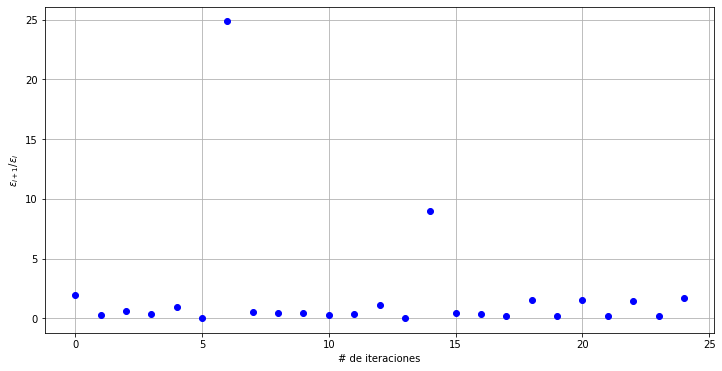

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(conv_b, 'bo')
plt.grid(True)
plt.xlabel("# de iteraciones")
plt.ylabel(r"$\epsilon_{i+1}/\epsilon_i$")
plt.show()

El error en la bisección puede diferir bastante entre cada iteración porque para $i$ podría estimar $x_c$ muy cerca de $r$ pero en $i+1$ se podría volver a alejar, dado que solo divide el intervalo a la mitad para generar la siguiente estimación.

#### Para IPF

In [21]:
conv_f_1 = conv_t(x_f_1, np.sqrt(2))
conv_f_2 = conv_t(x_f_2, np.sqrt(2))
conv_f_3 = conv_t(x_f_3, np.sqrt(2))
conv_f_4 = conv_t(x_f_4, np.sqrt(2))

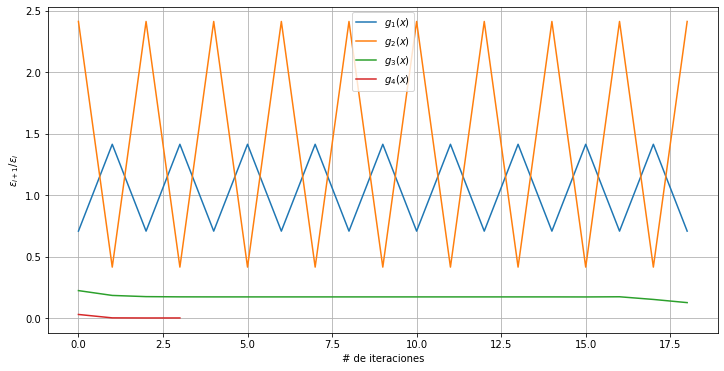

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(conv_f_1, label=r'$g_1(x)$')
plt.plot(conv_f_2, label=r'$g_2(x)$')
plt.plot(conv_f_3, label=r'$g_3(x)$')
plt.plot(conv_f_4, label=r'$g_4(x)$')
plt.grid(True)
plt.legend()
plt.xlabel("# de iteraciones")
plt.ylabel(r"$\epsilon_{i+1}/\epsilon_i$")
plt.show()

$g_4(x)$ parece tener el mejor comportamiento aunque $g_3(x)$ tampoco sería una opción incorrecta.

### Aproximación en cada iteracion

Podemos utilizar esta aproximación si no conocemos $r$.

\begin{equation}
    \frac{\epsilon_{i+1}}{\epsilon_i} \approx \frac{|x_{i+1}-x_{i}|}{|x_{i}-x_{i-1}|}
\end{equation}

In [23]:
conv = lambda x: error(x[2:], x[1:-1]) / error(x[1:-1], x[:-2])

#### Para bisección

In [24]:
conv_b = conv(x_b)
conv_b

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

#### Para IPF

In [25]:
conv_f_1 = conv(x_f_1)
conv_f_2 = conv(x_f_2)
conv_f_3 = conv(x_f_3)
conv_f_4 = conv(x_f_4)

In [26]:
conv_f_1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [27]:
conv_f_2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [28]:
conv_f_3

array([0.234151  , 0.18575959, 0.1741862 , 0.17202736, 0.17165104,
       0.17158629, 0.17157518, 0.17157327, 0.17157294, 0.17157288,
       0.17157286, 0.17157226, 0.1715725 , 0.1715798 , 0.17169266,
       0.17092867, 0.17716535, 0.15555556])

In [29]:
conv_f_4

array([2.94117647e-02, 8.66551126e-04, 7.50951802e-07])

Para que exista convergencia el cociente debe ser menor a $1$.

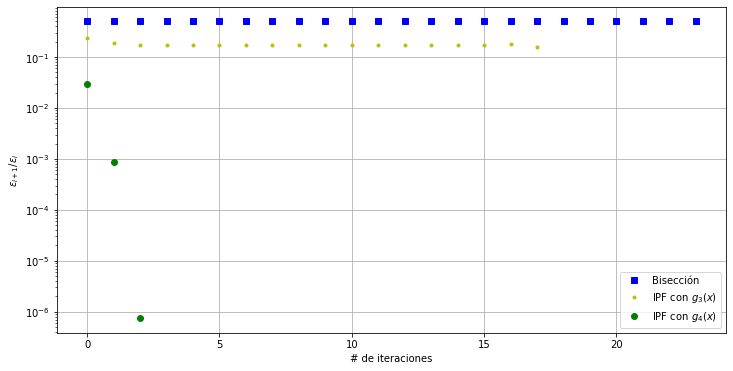

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(conv_b, 'bs', label="Bisección")
plt.plot(conv_f_3, 'y.', label="IPF con " + r"$g_3(x)$")
plt.plot(conv_f_4, 'go', label="IPF con " + r"$g_4(x)$")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xlabel("# de iteraciones")
plt.ylabel(r"$\epsilon_{i+1}/\epsilon_i$")
plt.show()

Parece

### Tasa $S$

Si $r=g(r)$ y $S = |g'(r)| < 1$.

En el caso de *IPF*:
* $g_1(x)=\frac{2}{x} \implies g_1'(x)=-\frac{2}{x^2}$, $S=|-1|=1$
* $g_2(x)=2+x-x^2 \implies g_2'(x)=1-2x$, $S=|1-2\sqrt{2}|\approx 1.83$
* $g_3(x)=\frac{2+x^3}{x^2 + x} \implies g_3'(x)=\frac{x^4+2 x^3-4x-2}{x^2 (1 + x)^2}$, $S\approx 0.172$
* $g_4(x)=\frac1x + \frac{x}{2} \implies g_4'(x)=-\frac{1}{x^2} + \frac12$, $S=|-\frac{1}{2}+\frac12| =0$

Teóricamente hay mejores elecciones de $g(x)$, ¿se valida con los resultados experimentales?

# Otro problema 

Resolver:

\begin{equation}
    f(x)=x^2-x-1$
\end{equation}

## Bisección

Simplemente aplicar el algoritmo en el intervalo adecuado.

In [31]:
f = lambda x: x ** 2 - x - 1

In [32]:
x = np.linspace(-2, 2, 100)

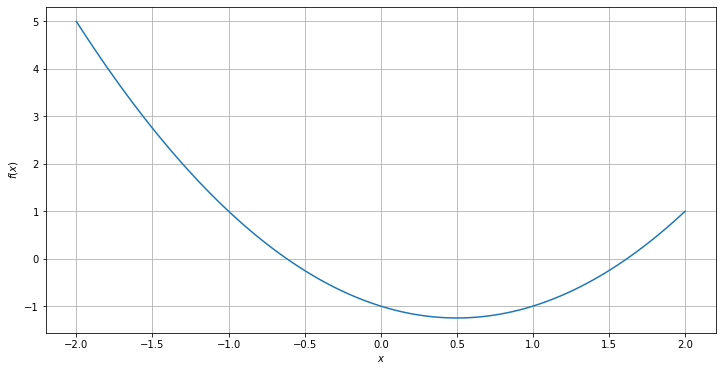

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(x, f(x))
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

Como existen $2$ raíces, hay que seleccionar el intervalo según la raíz que necesitemos. Para $x_1$ se utilizará $[-2,0]$ y $[0,2]$ para $x_2$. 

In [34]:
x_b_1 = bisect(f, -2, 0)
x_b_2 = bisect(f, 0, 2)

In [35]:
x_b_1[-1], x_b_2[-1]

(-0.6180339902639389, 1.618033990263939)

## Solución analítica:

\begin{equation}
    x_1 = \frac{1-\sqrt{5}}{2}, \quad x_2 = \frac{1+\sqrt{5}}{2}
\end{equation}

### Error de las aproximaciones

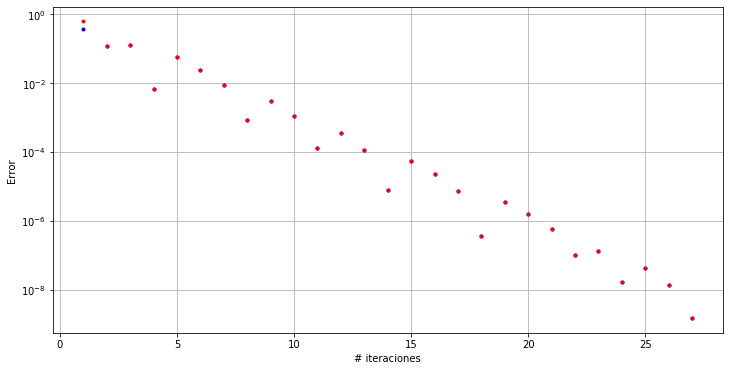

In [36]:
n_i_1 = np.arange(1, len(x_b_1) + 1)
n_i_2 = np.arange(1, len(x_b_2) + 1)
er_1 = error(x_b_1, (1 - np.sqrt(5)) / 2)
er_2 = error(x_b_2, (1 + np.sqrt(5)) / 2)
plt.figure(figsize=(12, 6))
plt.plot(n_i_1, er_1, 'b.')
plt.plot(n_i_2, er_2, 'r.')
plt.grid(True)
plt.xlabel("# iteraciones")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

Como era de esperarse con *bisección*, este decae lineal con respecto al número de iteraciones. 

## Iteración de Punto Fijo

### Definición de funciones $g(x)$

1. $f(x)=0$
2. $x = g(x) \implies f(x)=x-g(x)$

#### Versión 1
\begin{equation}
    \begin{split}
        x & = x^2-1 \\
        g_1(x) & = x^2-1
    \end{split}
\end{equation}

#### Versión 2
\begin{equation}
    \begin{split}
        x^2 &= x + 1 \quad / \frac1x \\
        x &= 1 + \frac1x \\
        g_2(x) &= 1 + \frac1x
    \end{split} 
\end{equation}

#### Versión 3
\begin{equation}
    \begin{split}
        x^2-x &= 1 \\
        x(x-1) &= 1 \\
        x &= \frac{1}{x-1} \\
        g_3(x) &= \frac{1}{x-1}
    \end{split}
\end{equation}

#### Versión 4
\begin{equation}
    \begin{split}
        x^2 &= x + 1  \quad +x^2\\
        2x^2 &= x^2 +x + 1 \quad \frac{1}{2x} \\
        x &= \frac{x}{2} + \frac{1}{2x} + \frac12 \\
        g_4(x) &= \frac{x}{2} + \frac{1}{2x} + \frac12 
    \end{split}
\end{equation}

### ¿Cuál nos servirá?

* $S_1=|g_1'(x)|=|2x|$
* $S_2=|g_2'(x)|=\left|-\frac{1}{x^2}\right|$
* $S_3=|g_3'(x)|=\left|-\frac{1}{(x-1)^2}\right|$
* $S_4=|g_4'(x)|=\left|\frac12 - \frac{1}{2x^2}\right|$

In [37]:
g1 = lambda x: x ** 2 - 1
g2 = lambda x: 1 + 1 / x
g3 = lambda x: 1 / (x - 1)
g4 = lambda x: 1/2 *(x + 1/x + 1)
g1p = lambda x: np.abs(2 * x)
g2p = lambda x: np.abs(- 1 / x ** 2)
g3p = lambda x: np.abs(-1 / (x - 1) ** 2)
g4p = lambda x: np.abs(1 / 2 * (1 - 1 / x**2))

Se puede realizar un análisis de forma visual, pero hay que evitar los problemas de indeterminación de las funciones $g'(x)$.

In [38]:
# x para evitar indeterminación...
xa = np.linspace(-1+1e-8, -1e-8)
xb = np.linspace(1e-8, 1-1e-8)
xc = np.linspace(1+1e-8, 2)

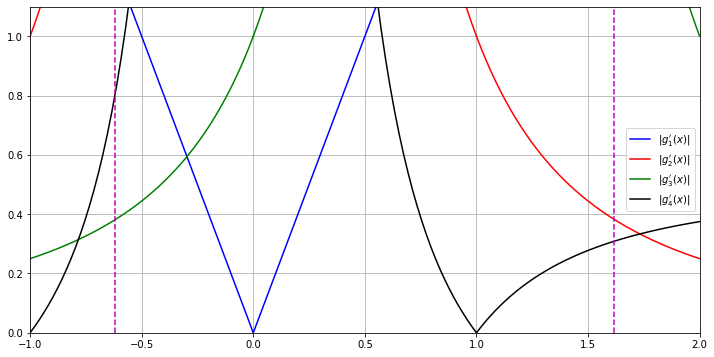

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(xa, g1p(xa), 'b-', label=r"$|g_1'(x)|$")
plt.plot(xb, g1p(xb), 'b-')
plt.plot(xa, g2p(xa), 'r-', label=r"$|g_2'(x)|$")
plt.plot(xb, g2p(xb), 'r-')
plt.plot(xc, g2p(xc), 'r-')
plt.plot(xa, g3p(xa), 'g-', label=r"$|g_3'(x)|$")
plt.plot(xb, g3p(xb), 'g-')
plt.plot(xc, g3p(xc), 'g-')
plt.plot(xa, g4p(xa), 'k-', label=r"$|g_4'(x)|$")
plt.plot(xb, g4p(xb), 'k-')
plt.plot(xc, g4p(xc), 'k-')
plt.axvline(x=(1-np.sqrt(5))/2, color='m', linestyle='--')
plt.axvline(x=(1+np.sqrt(5))/2, color='m', linestyle='--')
plt.ylim([0., 1.1])
plt.xlim([-1, 2])
plt.legend()
plt.grid(True)
plt.show()

Otra alternativa es analizar el valor de $|g'(x)|$ en $r$. Si no se conoce $r$ podemos buscar en un vecindario, por ejemplo $(r-\varepsilon, r+\varepsilon)$. $\varepsilon$ debe ser lo suficientemente pequeño, ya que segun las características de $g'(x)$ se puede concluir algo completamente erróneo. 

In [40]:
g1p(-0.6), g1p(3/2) 

(1.2, 3.0)

Se descarta $g_1(x)$

In [41]:
g2p(-0.6), g2p(3/2) 

(2.7777777777777777, 0.4444444444444444)

$g_2(x)$ nos sirve para la segunda raíz.

In [42]:
g3p(-0.6), g3p(3/2) 

(0.39062499999999994, 4.0)

$g_3(x)$ nos sirve para la primera raíz.

In [43]:
g4p(-0.6), g4p(3/2) 

(0.8888888888888888, 0.2777777777777778)

$g_4(x)$ nos sirve para ambas raíces, pero para la primera converge un poco más lento.

### Experimentos

Recordar que debemos escoger $x_0$ cercano a la raíz que necesitamos.

$g_2(x)$

In [44]:
x_2 = fpi(g2, 1, 20)
x_2

array([2.        , 1.5       , 1.66666667, 1.6       , 1.625     ,
       1.61538462, 1.61904762, 1.61764706, 1.61818182, 1.61797753,
       1.61805556, 1.61802575, 1.61803714, 1.61803279, 1.61803445,
       1.61803381, 1.61803406, 1.61803396, 1.618034  , 1.61803399])

$g_3(x)$

In [45]:
x_1 = fpi(g3, -1, 20)
x_1

array([-0.5       , -0.66666667, -0.6       , -0.625     , -0.61538462,
       -0.61904762, -0.61764706, -0.61818182, -0.61797753, -0.61805556,
       -0.61802575, -0.61803714, -0.61803279, -0.61803445, -0.61803381,
       -0.61803406, -0.61803396, -0.618034  , -0.61803399, -0.61803399])

In [46]:
conv_x_1 = conv(x_1)
conv_x_2 = conv(x_2)

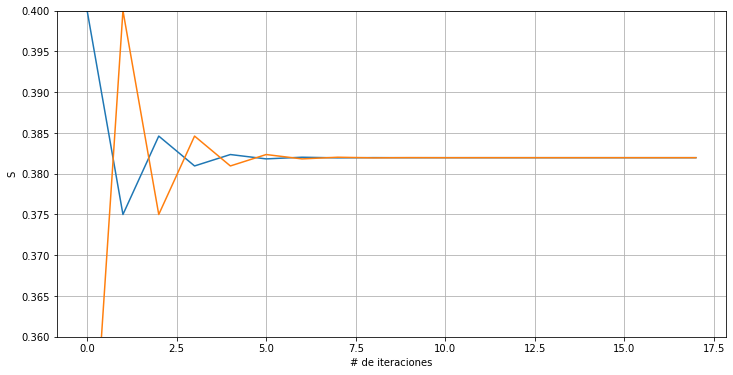

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(conv_x_1)
plt.plot(conv_x_2)
plt.ylim([0.36, 0.4])
plt.xlabel("# de iteraciones")
plt.ylabel("S")
plt.grid(True)
plt.show()

Evaluando en $r$...

In [48]:
g3p((1-np.sqrt(5))/2), g2p((1+np.sqrt(5))/2)

(0.38196601125010515, 0.38196601125010515)

$g_4(x)$

In [49]:
xx_1 = fpi(g4, -1, 20)
xx_1

array([-0.5       , -0.75      , -0.54166667, -0.69391026, -0.5675094 ,
       -0.66479737, -0.58450755, -0.64767471, -0.59582982, -0.63708069,
       -0.60337028, -0.63036367, -0.60837475, -0.62604923, -0.61168385,
       -0.62325765, -0.61386527, -0.62144361, -0.61530003, -0.62026171])

In [50]:
xx_2 = fpi(g4, 1, 20)
xx_2

array([1.5       , 1.58333333, 1.60745614, 1.61477855, 1.61702926,
       1.61772363, 1.61793809, 1.61800436, 1.61802483, 1.61803116,
       1.61803311, 1.61803372, 1.61803391, 1.61803396, 1.61803398,
       1.61803399, 1.61803399, 1.61803399, 1.61803399, 1.61803399])

In [51]:
conv_xx_1 = conv(xx_1)
conv_xx_2 = conv(xx_2)

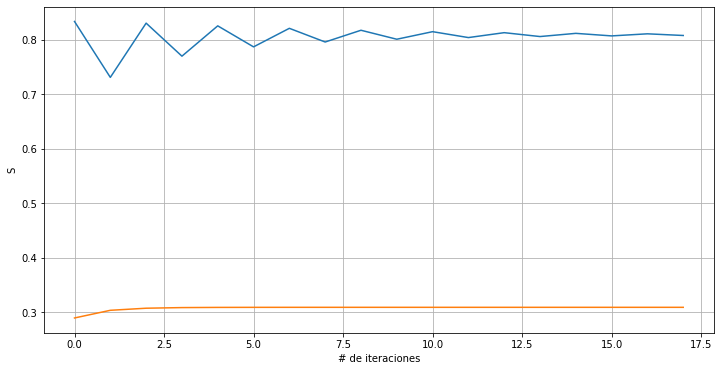

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(conv_xx_1)
plt.plot(conv_xx_2)
plt.xlabel("# de iteraciones")
plt.ylabel("S")
plt.grid(True)
plt.show()

In [53]:
g4p((1-np.sqrt(5))/2), g4p((1+np.sqrt(5))/2)

(0.8090169943749472, 0.30901699437494745)

## Conclusión

Según el $g(x)$ seleccionado vamos a obtener o no convergencia para distintos $x_0$. Incluso, para una buena elección de $g(x)$ podemos encontrar más de una raíz.